In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
digits.target[34]

'0'

In [4]:
digits.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(-0.5, 27.5, 27.5, -0.5)

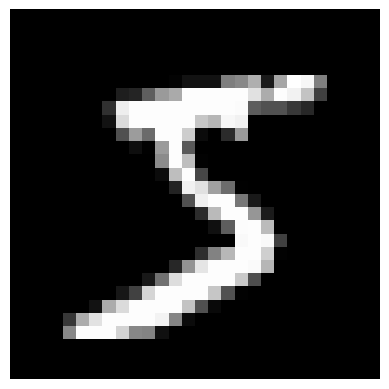

In [5]:
image_loc = digits.data.loc[0].values
reshape_image = np.reshape(image_loc, (28, 28))
plt.imshow(reshape_image, cmap="gray")
plt.axis("off")

In [6]:
print(digits.data.shape)

(70000, 784)


Train models

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [8]:
X, y = digits.data, digits.target

In [9]:
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [10]:
X = digits.data.astype('float32') / 255.0
X = np.array(X)
X = X.reshape(-1, 28, 28, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [12]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (63000, 28, 28, 1)
X_test shape (7000, 28, 28, 1)
y_train shape (63000, 10)
y_test shape (7000, 10)


In [13]:
knc = KNeighborsClassifier(n_neighbors=3, algorithm="brute")

In [14]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [15]:
X_train_flat.shape

(63000, 784)

Data augmentation

In [16]:
from scipy.ndimage.interpolation import shift

<ipython-input-16-c50379b1544a>:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [17]:
digits.data.shape

(70000, 784)

In [18]:
X_full = [image.reshape(28, 28) for image in X]
y_full = [target for target in y]

In [19]:
# Data augmentation
def move_digit():
  for loc_x, loc_y in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X, y):
      image_reshaped = image.reshape(28, 28)
      digits_augmented = shift(image_reshaped, (loc_x, loc_y)).reshape([-1])
      X_full.append(digits_augmented.reshape(28, 28))
      y_full.append(label)
move_digit()

In [20]:
X_array = np.array(X_full)

In [22]:
y_array = np.array(y_full)

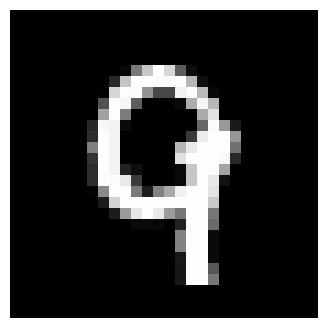

In [24]:
plt.figure(figsize=(8, 4))
plt.imshow(X_full[334], cmap='gray')
plt.axis('off')
plt.show()

In [25]:
X_flat_full = X_array.reshape(-1, 28 * 28)

In [26]:
X_train_augment, X_test_augment, y_train_augment, y_test_augment = train_test_split(X_flat_full, y_array, random_state=42, test_size=0.05)

In [27]:
print("X_train shape", X_train_augment.shape)
print("X_test shape", X_test_augment.shape)
print("y_train shape", y_train_augment.shape)
print("y_test shape", y_test_augment.shape)

X_train shape (332500, 784)
X_test shape (17500, 784)
y_train shape (332500, 10)
y_test shape (17500, 10)


In [28]:
augment_knc = KNeighborsClassifier()

In [29]:
augment_knc.fit(X_train_augment, y_train_augment)

KNeighborsClassifier()

In [30]:
augment_knc.score(X_test_augment, y_test_augment)

0.9817142857142858

In [31]:
import pickle

In [33]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(augment_knc, f)

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 128)        

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/10
1772/1772 [==============================] - 139s 78ms/step - loss: 0.1291 - accuracy: 0.9590 - val_loss: 0.0430 - val_accuracy: 0.9860
Epoch 2/10
1772/1772 [==============================] - 99s 56ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0335 - val_accuracy: 0.9903
Epoch 3/10
1772/1772 [==============================] - 96s 54ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0469 - val_accuracy: 0.9878
Epoch 4/10
1772/1772 [==============================] - 95s 54ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0303 - val_accuracy: 0.9916
Epoch 5/10
1772/1772 [==============================] - 96s 54ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.0378 - val_accuracy: 0.9890
Epoch 6/10
1772/1772 [==============================] - 96s 54ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0354 - val_accuracy: 0.9913
Epoch 7/10
1772/1772 [==============================] - 95s 54ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0327 

In [ ]:
model.evaluate(X_test, y_test)

219/219 [==============================] - 7s 31ms/step - loss: 0.0384 - accuracy: 0.9893


[0.038354989141225815, 0.9892857074737549]

In [ ]:
model.save("Mnist_model.keras")